In this project we are going to create noise of different "colors" and spectral analysis through FT. Noise is part of nature and science and knowing how to deal with it is very importnt in STEM. We need to inject some noise for the systems to work beter.

The term **Colors of Noise** Means different temporal characteristics of noise. The energy of signals over frequency changes: lower for slower fluctuations (lower frequency) and higher for higher frequency.

## White and Brown Noise

We will create two different noise signals and then inspect them in both, time and frequency domains. In this section they will be white and brown noise, in other sections we will create other types. Then we will take FT and calculate their amplitudes and frequencies (positive) and plot them. the formulas for creating white and brown noise are as follows:

1 - $w \sim N(\mu, \sigma^2)$

2 - $b_t = \sum_{i=1}^t w_i, \mu = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

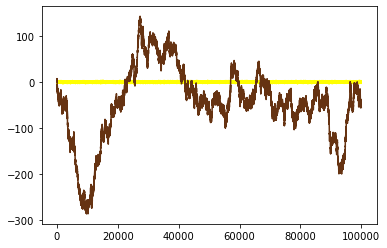

In [2]:
npnts = int(1e5)
whitenoise = np.random.randn(npnts)
brownnoise = np.cumsum(whitenoise)

plt.plot(whitenoise, color = [1,1,0])
plt.plot(brownnoise, color = [0.4, 0.2, 0.07])
plt.show()

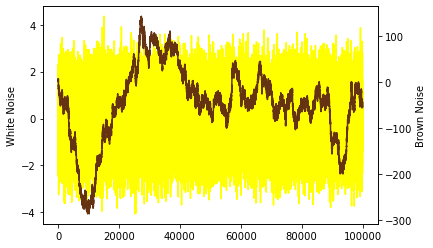

In [3]:
fig,ax = plt.subplots(1)
ax.plot(whitenoise, color = [1,1,0])
ax.set_ylabel("White Noise")
ax2 = ax.twinx() # Add another graph wih its own independent y-axis
ax2.plot(brownnoise, color = [0.4, 0.2, 0.07])
ax2.set_ylabel("Brown Noise")
plt.show()

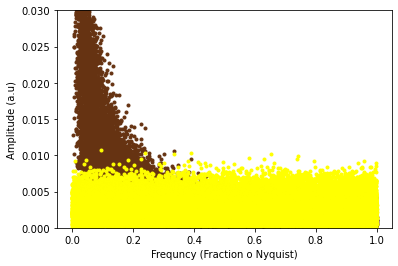

In [4]:
# Take the FT of the signals
whitenoiseX = np.abs(fftpack.fft(whitenoise))/npnts # normalize
brownnoiseX = np.abs(fftpack.fft(brownnoise))/npnts

# Vector of frequencies
frex = np.linspace(0, 1, int(npnts/2+1))
plt.plot(frex, brownnoiseX[:len(frex)], ".", color = [0.4, 0.2, 0.07])
plt.plot(frex, whitenoiseX[:len(frex)], ".", color = [1, 1, 0]) # To be on top
plt.ylim([0,0.03])
plt.xlabel("Frequncy (Fraction o Nyquist)")
plt.ylabel("Amplitude (a.u)")
plt.show()

## Pink & Blue Noise

Pink and Blue noise are first created in frequency domain, and then taking the inverse FT we creare their time domain. Pink noise is created according to the following formulas:

$fc = \alpha e^{i\phi}$, fc = Fourier Coefficient

$\alpha = 1/f + kn^2$, f = frequency, k modulated the amount of noise

$n \sim N(0,1)$, squared n will be positive

$\phi \sim U(0, 2\pi)$, phase, drawn from uniform distribution

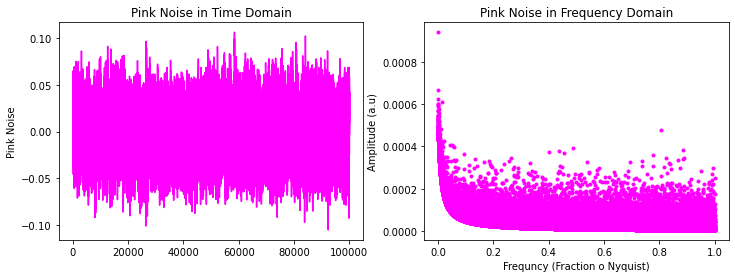

In [5]:
# Pink noise
# Define frex
frex = np.linspace(0, 1, int(npnts/2+1))
#Amplitude: alpha. Be careful, frequency starts at zero, so add a small constant
fc_amp = 1/(frex + 0.01) + (np.random.randn(int(npnts/2+1))**2)*5
# Uniformly distributed numbers between zero and 2pi (phi)
fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))

FourierSpect = np.zeros(npnts, dtype = complex)
FourierSpect[:int(npnts/2+1)] = fc_amp*np.exp(1j*fc_phs)

pinknoise = np.real(fftpack.ifft(FourierSpect))

pinknoiseX = np.abs(fftpack.fft(pinknoise))/ npnts

fig,ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(pinknoise, color = [1,0,1])
ax[0].set_ylabel("Pink Noise")
ax[0].set_title("Pink Noise in Time Domain")
ax[1].plot(frex, pinknoiseX[:len(frex)], ".", color = [1,0,1])
ax[1].set_ylabel("Amplitude (a.u)")
ax[1].set_xlabel("Frequncy (Fraction o Nyquist)")
ax[1].set_title("Pink Noise in Frequency Domain")
plt.show()

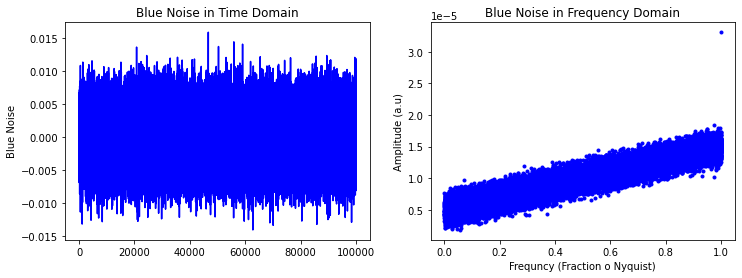

In [6]:
# Blue noise
# Define frex
frex = np.linspace(0, 1, int(npnts/2+1))
#Amplitude: Only this changes
fc_amp = np.linspace(1,3, int(npnts/2+1)) + np.random.randn(int(npnts/2+1))/5
# Uniformly distributed numbers between zero and 2pi (phi)
fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))

FourierSpect = np.zeros(npnts, dtype = complex)
FourierSpect[:int(npnts/2+1)] = fc_amp*np.exp(1j*fc_phs)

bluenoise = np.real(fftpack.ifft(FourierSpect))

bluenoiseX = np.abs(fftpack.fft(bluenoise))/ npnts

fig,ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(bluenoise, color = [0,0,1])
ax[0].set_ylabel("Blue Noise")
ax[0].set_title("Blue Noise in Time Domain")
ax[1].plot(frex, bluenoiseX[:len(frex)], ".", color = [0,0,1])
ax[1].set_ylabel("Amplitude (a.u)")
ax[1].set_xlabel("Frequncy (Fraction o Nyquist)")
ax[1].set_title("Blue Noise in Frequency Domain")
plt.show()

## Colorful Spectral Rainbow

In [7]:
def whiteNoiseSpect(amp, npnts):
    noise = amp * np.random.randn(npnts)
    return abs(fftpack.fft(noise)/npnts)

def brownNoiseSpect(amp, npnts):
    noise = np.cumsum(amp * np.random.randn(npnts))
    return abs(fftpack.fft(noise)/npnts)

def pinkNoiseSpect(amp, npnts):
    FourierSpect = np.zeros(npnts, dtype = complex)
    frex = np.linspace(0, 1, int(npnts/2+1))
    fc_amp = 1/(frex + 0.01) + (np.random.randn(int(npnts/2+1))**2)*5
    fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))
    FourierSpect[:int(npnts/2+1)] = fc_amp*np.exp(1j*fc_phs)
    noise = amp*np.real(fftpack.ifft(FourierSpect))
    return abs(fftpack.fft(noise)/npnts)

def blueNoiseSpect(amp, npnts):
    FourierSpect = np.zeros(npnts, dtype = complex)
    frex = np.linspace(0, 1, int(npnts/2+1))
    fc_amp = np.linspace(1,3, int(npnts/2+1)) + np.random.randn(int(npnts/2+1))/5
    fc_phs = 2*np.pi * np.random.rand(int(npnts/2+1))
    FourierSpect[:int(npnts/2+1)] = fc_amp*np.exp(1j*fc_phs)
    noise = amp*np.real(fftpack.ifft(FourierSpect))
    return abs(fftpack.fft(noise)/npnts)

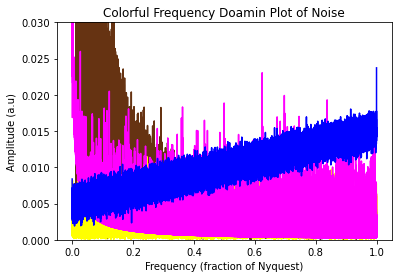

In [8]:
plt.plot(frex, brownNoiseSpect(1, int(1e5))[:len(frex)], color = [.4,.2,.07])
plt.plot(frex, whiteNoiseSpect(1, int(1e5))[:len(frex)], color = [1,1,0])
plt.plot(frex, pinkNoiseSpect(50, int(1e5))[:len(frex)], color = [1,0,1])
plt.plot(frex, blueNoiseSpect(1000, int(1e5))[:len(frex)], color = [0,0,1])
plt.ylim([0,0.03])
plt.xlabel("Frequency (fraction of Nyquest)")
plt.ylabel("Amplitude (a.u)")
plt.title("Colorful Frequency Doamin Plot of Noise")
plt.show()

## Bonus: How Do They Sound

Different colos of noise have different statistical properties, so they indicate different features and ways a system may function. They are also used in audio: different colors of noise sound different.

In [9]:
from IPython.display import Audio

In [10]:
print("White noise")
Audio(whitenoise, rate=44100)

White noise


In [11]:
print("Brown noise")
Audio(brownnoise, rate=44100)

Brown noise


In [12]:
print("Pink noise")
Audio(pinknoise, rate=44100)

Pink noise


In [13]:
print("Blu noise")
Audio(bluenoise, rate=44100)

Blu noise
